In [1]:
%pip install langsmith openai python-dotenv langchain langchain-openai langchain-pinecone

  Obtaining dependency information for langsmith from https://files.pythonhosted.org/packages/de/f0/63b06b99b730b9954f8709f6f7d9b8d076fa0a973e472efe278089bde42b/langsmith-0.1.147-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity!=8.4.0,<9.0.0,>=8.1.0 from https://files.pythonhosted.org/packages/d2/3f/8ba87d9e287b9d385a02a7114ddcef61b26f86411e121c9003eb509a1773/tenacity-8.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/311.8 kB ? eta -:--:--
   --------------------------------------- 311.8/311.8 kB 18.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.2.10
    Uninstalling langsmith-0.2.10:
      Successfully uninstalled langsmith-0.2.10
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Evaluation
## LLM Evaluation의 중요성
https://docs.smith.langchain.com/evaluation/tutorials/rag
- 서비스를 안정적으로 운영하기 위해서 사용자가 정확한 정보를 받을 수 있는지 확인하는 것이 중요함
- 사용자가 정확한 정보를 받을 수 있는지 확인하는 것은 서비스의 신뢰성을 높이고 사용자 경험을 향상시키는 데 도움이 됨
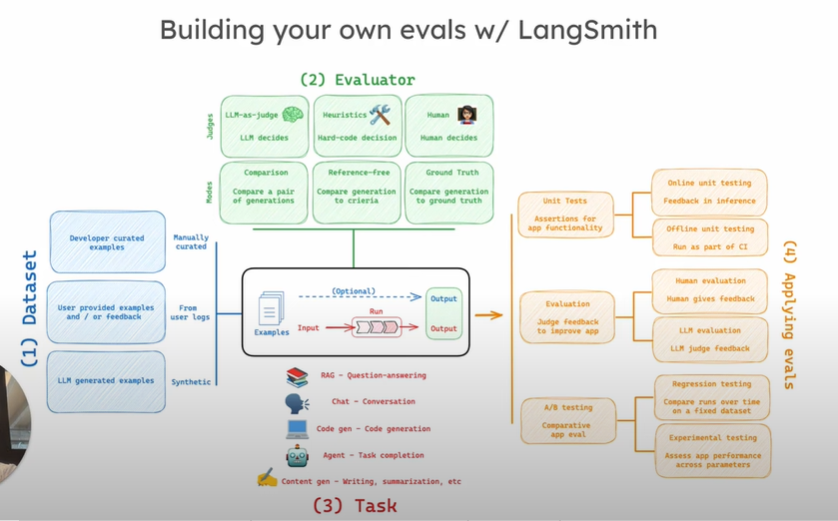

# 데이터 생성
- Evaluation에 활용될 Question - Answer Pair 생성

In [2]:
from langsmith import Client

client = Client()

# Define dataset: these are your test cases
dataset_name = "income_tax_dataset"
dataset = client.create_dataset(dataset_name)
client.create_examples(
    inputs=[
        {"input_question": "제1조에 따른 소득세법의 목적은 무엇인가요?"},
        {"input_question": "'거주자'는 소득세법에서 어떻게 정의되나요?"},
        {"input_question": "'비거주자'는 소득세법에 따라 어떻게 정의되나요?"},
        {"input_question": "소득세법에 따른 '내국법인'은 누구를 의미하나요?"},
        {"input_question": "소득세법에 따라 소득세를 납부할 의무가 있는 사람은 누구인가요?"},
        {"input_question": "거주자의 과세 범위는 무엇인가요?"},
        {"input_question": "소득세법에 따라 소득은 어떻게 분류되나요?"},
        {"input_question": "종합소득이란 무엇인가요?"},
        {"input_question": "세금이 면제되는 소득의 종류는 무엇인가요?"},
        {"input_question": "소득세의 과세기간은 어떻게 되나요?"},
        {"input_question": "거주자의 소득세 납세지는 어디인가요?"},
        {"input_question": "비거주자의 소득세 납세지는 어디인가요?"},
        {"input_question": "납세지가 불분명한 경우 어떻게 되나요?"},
        {"input_question": "원천징수세액의 납세지는 어떻게 결정되나요?"},
        {"input_question": "납세자의 사망 시 납세지는 어떻게 되나요?"},
        {"input_question": "신탁 소득에 대한 납세의 범위는 무엇인가요?"},
        {"input_question": "원천징수 대상 소득은 무엇인가요?"},
        {"input_question": "공동 소유 자산의 양도소득은 어떻게 과세되나요?"},
        {"input_question": "이자 소득의 출처는 무엇인가요?"},
        {"input_question": "소득세법에서 배당소득은 어떻게 정의되나요?"}
    ],
    outputs=[
        {"output_answer": "소득세법의 목적은 소득의 성격과 납세자의 부담능력에 따라 적정하게 과세함으로써 조세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지하는 것입니다."},
        {"output_answer": "'거주자'는 한국에 주소를 두거나 183일 이상 거소를 둔 개인을 의미합니다."},
        {"output_answer": "'비거주자'는 거주자가 아닌 개인을 의미합니다."},
        {"output_answer": "'내국법인'은 법인세법 제2조 제1호에 따른 내국법인을 의미합니다."},
        {"output_answer": "거주자 및 국내원천소득이 있는 비거주자는 소득세를 납부할 의무가 있습니다."},
        {"output_answer": "거주자는 법에서 규정한 모든 소득에 대해 과세되며, 비거주자는 국내원천소득에 대해서만 과세됩니다."},
        {"output_answer": "소득은 종합소득, 퇴직소득, 양도소득으로 분류됩니다."},
        {"output_answer": "종합소득은 이자소득, 배당소득, 사업소득, 근로소득, 연금소득 및 기타소득을 포함합니다."},
        {"output_answer": "비과세 소득에는 공익신탁의 이익, 특정 사업소득 및 기타 법에서 정한 특정 소득이 포함됩니다."},
        {"output_answer": "소득세의 과세기간은 매년 1월 1일부터 12월 31일까지입니다."},
        {"output_answer": "거주자의 소득세 납세지는 주소지이며, 주소지가 없으면 거소지입니다."},
        {"output_answer": "비거주자의 소득세 납세지는 국내사업장의 소재지입니다. 국내사업장이 여러 곳인 경우 주된 사업장의 소재지가 납세지가 됩니다."},
        {"output_answer": "납세지가 불분명한 경우 대통령령으로 정합니다."},
        {"output_answer": "원천징수세액의 납세지는 원천징수자의 종류와 위치에 따라 결정됩니다."},
        {"output_answer": "납세자의 사망 시 상속인 또는 납세관리인의 주소지나 거소지가 납세지가 됩니다."},
        {"output_answer": "신탁 소득에 대한 납세의 범위는 신탁의 수익자가 해당 소득에 대해 납세의무를 집니다."},
        {"output_answer": "이자소득, 배당소득 및 기타 법에서 정한 소득은 원천징수 대상입니다."},
        {"output_answer": "공동 소유 자산의 양도소득은 각 거주자 소유 지분에 따라 과세됩니다."},
        {"output_answer": "이자 소득의 출처는 정부 및 지방자치단체가 발행한 채권, 법인이 발행한 채권, 국내외 은행 예금 등입니다."},
        {"output_answer": "배당소득은 국내외 법인으로부터 받는 배당금 및 배분금, 기타 법에서 정한 소득을 포함합니다."}
    ],
    metadata= [
        {"contexts": "제1조(목적) 이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하게 과세함으로써 조세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 한다."},
        {"contexts": "제1조의2(정의) “거주자”란 국내에 주소를 두거나 183일 이상의 거소를 둔 개인을 말한다."},
        {"contexts": "제1조의2(정의) “비거주자”란 거주자가 아닌 개인을 말한다."},
        {"contexts": "제1조의2(정의) “내국법인”이란 「법인세법」 제2조제1호에 따른 내국법인을 말한다."},
        {"contexts": "제2조(납세의무) 거주자 및 국내원천소득이 있는 비거주자는 소득세를 납부할 의무가 있다."},
        {"contexts": "제3조(과세소득의 범위) 거주자는 법에서 규정한 모든 소득에 대해 과세되며, 비거주자는 국내원천소득에 대해서만 과세된다."},
        {"contexts": "제4조(소득의 구분) 소득은 종합소득, 퇴직소득, 양도소득으로 분류된다."},
        {"contexts": "제4조(소득의 구분) 종합소득은 이자소득, 배당소득, 사업소득, 근로소득, 연금소득 및 기타소득을 포함한다."},
        {"contexts": "제12조(비과세소득) 비과세 소득에는 공익신탁의 이익, 특정 사업소득 및 기타 법에서 정한 특정 소득이 포함된다."},
        {"contexts": "제5조(과세기간) 소득세의 과세기간은 매년 1월 1일부터 12월 31일까지이다."},
        {"contexts": "제6조(납세지) 거주자의 소득세 납세지는 주소지이며, 주소지가 없으면 거소지이다."},
        {"contexts": "제6조(납세지) 비거주자의 소득세 납세지는 국내사업장의 소재지이다. 국내사업장이 여러 곳인 경우 주된 사업장의 소재지이다."},
        {"contexts": "제6조(납세지) 납세지가 불분명한 경우에는 대통령령으로 정한다."},
        {"contexts": "제7조(원천징수 등의 경우의 납세지) 원천징수세액의 납세지는 원천징수자의 종류와 위치에 따라 결정된다."},
        {"contexts": "제8조(상속 등의 경우의 납세지) 납세자의 사망 시 상속인 또는 납세관리인의 주소지나 거소지가 납세지가 된다."},
        {"contexts": "제2조의3(신탁재산 귀속 소득에 대한 납세의무의 범위) 신탁 소득에 대한 납세의 범위는 신탁의 수익자가 해당 소득에 대해 납세의무를 진다."},
        {"contexts": "제14조(과세표준의 계산) 이자소득, 배당소득 및 기타 법에서 정한 소득은 원천징수 대상이다."},
        {"contexts": "제14조(과세표준의 계산) 공동 소유 자산의 양도소득은 각 거주자 소유 지분에 따라 과세된다."},
        {"contexts": "제16조(이자소득) 이자 소득의 출처는 정부 및 지방자치단체가 발행한 채권, 법인이 발행한 채권, 국내외 은행 예금 등이다."},
        {"contexts": "제17조(배당소득) 배당소득은 국내외 법인으로부터 받는 배당금 및 배분금, 기타 법에서 정한 소득을 포함한다."}
    ],
    dataset_id=dataset.id,
)

# Retriever 생성
- Evaluation을 위한 Retriever 생성
- 3.x에서 생성한 Pinecone Retriever


In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from dotenv import load_dotenv
from langchain_openai import OpenAIEmbeddings

load_dotenv()

# OpenAI Embedding 생성
embedding = OpenAIEmbeddings(model="text-embedding-3-large")  # proxy 오류 발생 시 httpx==0.27.2 로 다운그레이드


In [3]:
from langchain_pinecone import PineconeVectorStore

index_name = 'tax-markdown-table-index'

# pinecone vector 데이터베이스 리트리버 생성
database = PineconeVectorStore.from_existing_index(index_name=index_name, embedding=embedding)
retriever = database.as_retriever()

# LLM 답변 생성을 위한 RAG bot

In [4]:
### RAG bot

import openai
from langsmith import traceable
from langsmith.wrappers import wrap_openai

class RagBot:

    def __init__(self, retriever, model: str = "gpt-4o"):
        # 위에서 선언한 retriever를 할용해서 Retrieval 실행
        self._retriever = retriever
        # Wrapping the client instruments the LLM
        # LangSmith 문법
        self._client = wrap_openai(openai.Client())
        self._model = model

    @traceable()
    def retrieve_docs(self, question):
        return self._retriever.invoke(question)

    @traceable()
    def invoke_llm(self, question, docs):
        # `retrieve_docs()` 를 통해 가져온 문서들을 system prompt로 전달
        # 3.3에서 했던 방식과 유사함
        response = self._client.chat.completions.create(
            model=self._model,
            messages=[
                {
                    "role": "system",
                    "content": "당신은 한국의 소득세 전문가입니다."
                    "아래 소득세법을 참고해서 사용자의 질문에 답변해주세요.\n\n"
                    f"## 소득세법\n\n{docs}",
                },
                {"role": "user", "content": question},
            ],
        )

        # Evaluators 를 활용해서 `answer`와 `context`를 평가할 예정
        return {
            "answer": response.choices[0].message.content,
            "contexts": [str(doc) for doc in docs],
        }

    @traceable()
    def get_answer(self, question: str):
        docs = self.retrieve_docs(question)
        return self.invoke_llm(question, docs)

# pinecone 리트리버 전달
rag_bot = RagBot(retriever)

In [5]:
def predict_rag_answer(example: dict):
    """답변만 평가할 때 사용"""
    response = rag_bot.get_answer(example["input_question"])
    return {"answer": response["answer"]}

def predict_rag_answer_with_context(example: dict):
    """Context를 활용해서 hallucination을 평가할 때 사용"""
    response = rag_bot.get_answer(example["input_question"])
    return {"answer": response["answer"], "contexts": response["contexts"]}

In [6]:
from langchain import hub
from langchain_openai import ChatOpenAI

# Grade prompt
# 답변의 정확도를 측정하기위해 사용되는 프롬프트
grade_prompt_answer_accuracy = prompt = hub.pull("langchain-ai/rag-answer-vs-reference")

def answer_evaluator(run, example) -> dict:
    """
    RAG 답변 성능을 측정하기 위한 evaluator
    """

    # `example`이 데이터를 생성할 때 입력한 `Question-Answer` pair. `run`은 `RagBot`을 활용해서 생성한 LLM의 답변
    input_question = example.inputs["input_question"]
    reference = example.outputs["output_answer"]
    prediction = run.outputs["answer"]

    # LLM Judge로 사용될 LLM
    llm = ChatOpenAI(model="gpt-4o", temperature=0)

    # LLM 응답을 위한 LCEL 활용
    # 3.6 `dictionary_chain`의 `prompt | llm | StrOutputParser()`` 의 구조와 유사함
    answer_grader = grade_prompt_answer_accuracy | llm

    # Evaluator 실행
    score = answer_grader.invoke({"question": input_question,
                                  "correct_answer": reference,
                                  "student_answer": prediction})
    score = score["Score"]

    return {"key": "answer_v_reference_score", "score": score}

In [7]:
# Grade prompt
# 답변이 사용자의 질문에 얼마나 도움되는지 판단하는 프롬프트
grade_prompt_answer_helpfulness = prompt = hub.pull("langchain-ai/rag-answer-helpfulness")

def answer_helpfulness_evaluator(run, example) -> dict:
    """
    답변이 사용자의 질문에 얼마나 도움되는지 판단하는 Evaluator
    """

    # 데이터셋의 답변과 비교하지 않고, 데이터셋의 질문에 대한 LLM의 답변의 가치를 평가함
    input_question = example.inputs["input_question"]
    prediction = run.outputs["answer"]

    # LLM Judge로 사용될 LLM
    llm = ChatOpenAI(model="gpt-4o", temperature=0)

    # LLM 응답을 위한 LCEL 활용
    # 3.6 `dictionary_chain`의 `prompt | llm | StrOutputParser()`` 의 구조와 유사함
    answer_grader = grade_prompt_answer_helpfulness | llm

    # Evaluator 실행
    score = answer_grader.invoke({"question": input_question,
                                  "student_answer": prediction})
    score = score["Score"]

    return {"key": "answer_helpfulness_score", "score": score}

In [8]:
# Prompt
# hallucination 판단을 위한 프롬프트
grade_prompt_hallucinations = prompt = hub.pull("langchain-ai/rag-answer-hallucination")

def answer_hallucination_evaluator(run, example) -> dict:
    """
    hallucination 판단을 위한 Evaluator
    """

    # 데이터셋에 있는 질문과, LLM이 답변을 생성할 때 사용한 context를 활용
    input_question = example.inputs["input_question"]
    contexts = run.outputs["contexts"]

    # LLM의 답변
    prediction = run.outputs["answer"]

    # LLM Judge로 사용될 LLM
    llm = ChatOpenAI(model="gpt-4o", temperature=0)

    # LLM 응답을 위한 LCEL 활용
    # 3.6 `dictionary_chain`의 `prompt | llm | StrOutputParser()`` 의 구조와 유사함
    answer_grader = grade_prompt_hallucinations | llm

    # Evaluator 실행
    score = answer_grader.invoke({"documents": contexts,
                                  "student_answer": prediction})
    score = score["Score"]

    return {"key": "answer_hallucination", "score": score}

In [9]:
from langsmith.evaluation import evaluate

dataset_name = "income_tax_dataset"
experiment_results = evaluate(
    predict_rag_answer_with_context, # 어떤 함수를 활용해서 LLM 답변을 확인할지 지정, hallucination 판단 여부에 따라 `with_context` 사용
    data=dataset_name, # Evaluation에 사용될 dataset의 이름
    evaluators=[answer_evaluator, answer_helpfulness_evaluator, answer_hallucination_evaluator], # 실행할 Evaluator의 종류
    experiment_prefix="inflearn-evaluator-lecture-hallucination",
    metadata={"version": "income tax v1, gpt-4o"}, 
)

View the evaluation results for experiment: 'inflearn-evaluator-lecture-hallucination-a9b4bbab' at:
https://smith.langchain.com/o/0f3b204d-a3c2-52d3-a8a3-562de88bf9da/datasets/475d6d08-6b4d-43a2-a148-e81aa6634f79/compare?selectedSessions=67c12319-3467-4137-9b7d-17ba2a658941




10it [02:21, 11.58s/it]Error running evaluator <DynamicRunEvaluator answer_helpfulness_evaluator> on run 7b5cd522-0953-404e-9ac8-d44174a96461: OutputParserException('Function Grade arguments:\n\n{"Score":1,"Explanation":"The student\'s answer is concise and directly addresses the question about the income tax period. The answer specifies that the tax period is from January 1 to December 31, which is\n\nare not valid JSON. Received JSONDecodeError Unterminated string starting at: line 1 column 26 (char 25)\nFor troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE \nFor troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE ')
Traceback (most recent call last):
  File "c:\Users\kimdo\AppData\Local\pypoetry\Cache\virtualenvs\rag-llm어플리케이션실습-dgGHJXyp-py3.10\lib\site-packages\langsmith\evaluation\_runner.py", line 1573, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
  Fil

KeyboardInterrupt: 